# Chapter 1: Introduction - When Selfish is Slow

Welcome to Algorithmic Game Theory! In this book, we explore what happens when computer science meets economics. We aren't just looking at algorithms that run on a single computer; we are looking at systems where the "inputs" are people (or agents) who are trying to maximize their own benefit.

## The Core Concept: The Price of Anarchy
One of the biggest surprises in this field is that **selfish behavior can hurt everyone**, including the people being selfish. We often assume that giving people more options (like building a new road) will always improve the situation. Game Theory shows us this isn't true.

This phenomenon is captured by **Braess's Paradox**.

### The Scenario
Imagine 4,000 drivers want to get from a **Start** point to an **End** point.
* There are two initial routes: Top and Bottom.
* Each route has two parts: a **wide highway** (fast, always takes 45 mins) and a **narrow road** (slow, takes longer if there is traffic).

**The Paradox:** If we build a super-fast "teleport" road connecting the middle points, everyone will try to use it to save time. But because *everyone* does this, the traffic jams get so bad that **every single driver arrives later than before.**

This proves that **individual rationality** (doing what is best for you) can lead to **collective irrationality** (a result that is bad for everyone).

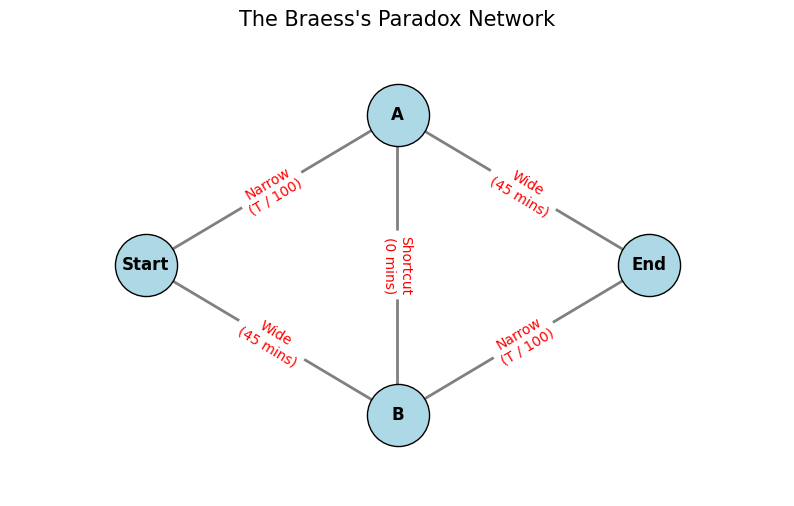

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_braess_network():
    # 1. Create a directed graph
    G = nx.DiGraph()
    
    # 2. Add Nodes
    # Positions: Start (Left), End (Right), A (Top), B (Bottom)
    pos = {
        'Start': (0, 1),
        'End': (2, 1),
        'A': (1, 2),
        'B': (1, 0)
    }
    
    # 3. Add Edges (Roads) with labels for their Cost (Travel Time)
    # T = number of cars
    edges = [
        ('Start', 'A', 'Narrow\n(T / 100)'),
        ('Start', 'B', 'Wide\n(45 mins)'),
        ('A', 'End', 'Wide\n(45 mins)'),
        ('B', 'End', 'Narrow\n(T / 100)'),
        # The Shortcut
        ('A', 'B', 'Shortcut\n(0 mins)')
    ]
    
    G.add_edges_from([(u, v) for u, v, label in edges])
    
    # 4. Draw the Graph
    plt.figure(figsize=(10, 6))
    
    # Draw Nodes
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Draw Edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=2)
    
    # Draw Edge Labels (The Costs)
    edge_labels = {(u, v): label for u, v, label in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
    
    # Title and Layout
    plt.title("The Braess's Paradox Network", fontsize=15)
    plt.axis('off') # Turn off the x/y axis numbers
    plt.margins(0.2)
    plt.show()

# Run the function to display the graph
draw_braess_network()

--- Braess's Paradox Simulation ---
Total Drivers: 4000

Scenario 1: Two separate routes (No shortcut)
Travel Time per Driver: 65.0 minutes

Scenario 2: Ultra-fast shortcut added
Travel Time per Driver: 80.0 minutes

Result: Adding the shortcut made everyone 15.0 minutes slower!


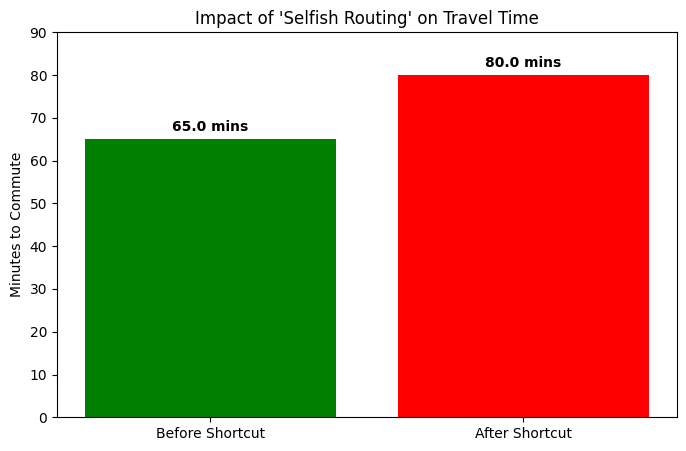

In [5]:
import matplotlib.pyplot as plt

def calculate_travel_time(drivers, use_shortcut=False):
    """
    Calculates total travel time for a single driver based on traffic distribution.
    
    Path options:
    1. Start -> A -> End (Top Path)
    2. Start -> B -> End (Bottom Path)
    3. Start -> A -> B -> End (The Zig-Zag Shortcut)
    """
    
    # Cost functions
    # Wide road: Always takes 45 minutes
    # Narrow road: Takes (number_of_drivers / 100) minutes
    
    if not use_shortcut:
        # NASH EQUILIBRIUM WITHOUT SHORTCUT
        # Drivers split 50/50 because paths are identical.
        drivers_top = drivers / 2
        drivers_bottom = drivers / 2
        
        # Time = (Narrow Road) + (Wide Road)
        time_top = (drivers_top / 100) + 45
        time_bottom = 45 + (drivers_bottom / 100)
        
        return time_top
    
    else:
        # NASH EQUILIBRIUM WITH SHORTCUT
        # The shortcut (A->B) is instantaneous (0 mins).
        # Everyone tries to take Start->A->B->End because A is better than the wide road 
        # and B is better than the wide road.
        
        # All 4000 drivers jam into the narrow roads.
        time_zigzag = (drivers / 100) + 0 + (drivers / 100)
        return time_zigzag

# --- Parameters ---
total_drivers = 4000

# 1. Calculate Time WITHOUT the shortcut
time_before = calculate_travel_time(total_drivers, use_shortcut=False)

# 2. Calculate Time WITH the shortcut
time_after = calculate_travel_time(total_drivers, use_shortcut=True)

# --- Output Results ---
print(f"--- Braess's Paradox Simulation ---")
print(f"Total Drivers: {total_drivers}")
print(f"\nScenario 1: Two separate routes (No shortcut)")
print(f"Travel Time per Driver: {time_before} minutes")

print(f"\nScenario 2: Ultra-fast shortcut added")
print(f"Travel Time per Driver: {time_after} minutes")

print(f"\nResult: Adding the shortcut made everyone {time_after - time_before} minutes slower!")

# --- Visualization ---
labels = ['Before Shortcut', 'After Shortcut']
times = [time_before, time_after]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['green', 'red'])
plt.ylabel('Minutes to Commute')
plt.title("Impact of 'Selfish Routing' on Travel Time")
plt.ylim(0, 90)
for i, v in enumerate(times):
    plt.text(i, v + 2, str(v) + " mins", ha='center', fontweight='bold')
plt.show()

### What just happened?
In the code above, you will see that adding a shortcut (Scenario 2) actually increased travel time from **65 minutes** to **80 minutes**.

* **Before:** Drivers split up. Traffic was balanced.
* **After:** The "Narrow" roads became so attractive individually that everyone used them, causing a massive bottleneck.

This teaches us that simply "adding capacity" (like building more roads or buying more servers) doesn't always solve congestion if you ignore game theory!